In [1]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

img = cv2.imread('images/nim.jpg')
img = cv2.rectangle(img, (180, 35), (20, 200), (0,0,255), 3)

font = ImageFont.truetype("fonts/gulim.ttc", 30)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)

draw.text((30,50), '님피아', font=font, fill=(255,0,0,0))
img_pil.show()

## 이미지 합성하기

#### 비트 연산
- 비트 단위로 논리 연산을 할 때 사용하는 연산
    - AND, OR, XOR, NOT 등
    - cv2.bitwise_and(src1,src2[,dst[,mask]])
    - cv2.bitwise_or(src1,src2[,dst[,mask]])
    - cv2.bitwise_not(src1[,dst[,mask]])
    - cv2.bitwise_xor(src1,src2[,dst[,mask]])

In [6]:
!python ex02.py

^C


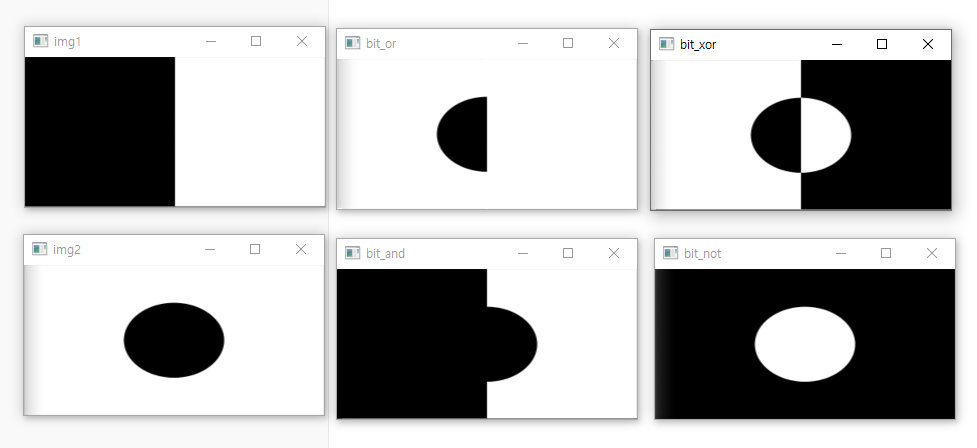

### HSV
- 색을 표현하는 색상공간 중 하나
- 색상(H), 채도(S), 명도(V)
- 채도 : 색상의 선명한 정도, 채도가 낮으면 탁하다, 채도가 높을수록 선명
- 명도 : 색의 밝은 정도, 명도가 가장 높으면 흰색, 가장 낮으면 검정색

- cv2.inRange(src, lower range, upper range, dst)
    - src : 목적이 되는 이미지
    - lower range : 픽셀의 최솟값
    - upper range : 픽셀의 최댓값

    - lower range보다 크고 upper range보다 작은 값에 속하는 픽셀을 뽑아낸다 

In [7]:
# 색상 추가하기
import cv2
import numpy as np

img = cv2.imread('images/01_lenna.png')
cv2.imshow('original', img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 주황색
lower = np.array([-20, 100, 100]) # => lower matrix는 항상 n, 100, 100
upper = np.array([20, 255, 255])  # => upper matrix는 항상 m, 255, 255

mask = cv2.inRange(hsv, lower, upper)
img2 = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('orange', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

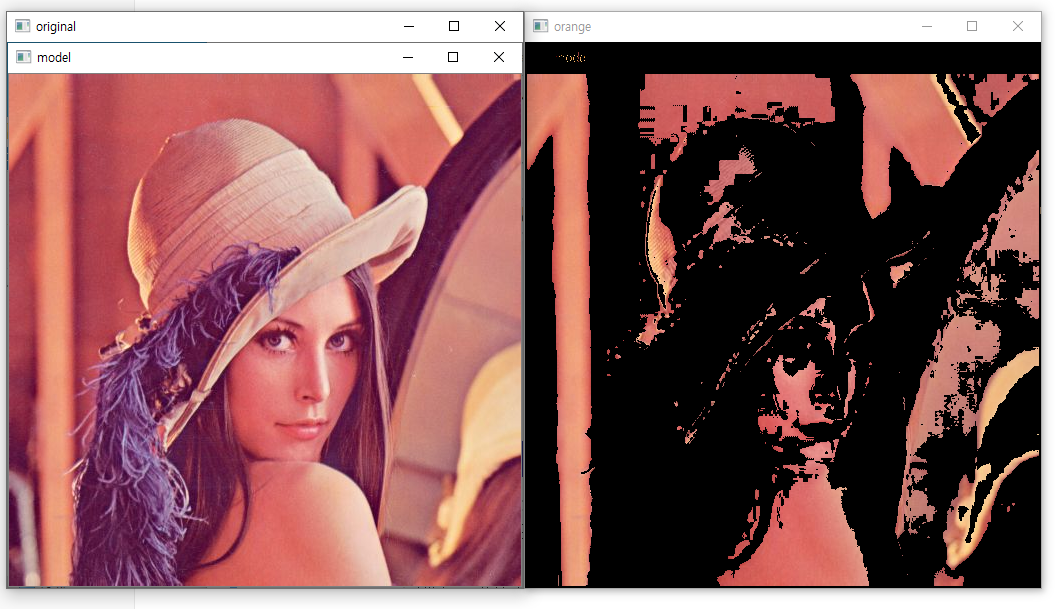

In [1]:
# 비디오에서 색상 추적하기
import cv2
import numpy as np

video = cv2.VideoCapture('videos/puppy.mp4')

while video.isOpened():
    ret, frame = video.read()

    if ret :
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        lower_blue = np.array([110, 100, 100])
        upper_blue = np.array([150, 255, 255])
        lower_green = np.array([50, 100, 100])
        upper_green = np.array([90, 255, 255])
        lower_red = np.array([-10, 100, 100])
        upper_red = np.array([30, 255, 255])

        mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_green = cv2.inRange(hsv, lower_green, upper_green)
        mask_red = cv2.inRange(hsv, lower_red, upper_red)

        res1 = cv2.bitwise_and(frame, frame, mask=mask_blue)
        res2 = cv2.bitwise_and(frame, frame, mask=mask_green)
        res3 = cv2.bitwise_and(frame, frame, mask=mask_red)

        cv2.imshow('Original', frame)
        cv2.imshow('Blue', res1)
        cv2.imshow('Green', res2)
        cv2.imshow('Red', res3)

        if cv2.waitKey(25) == ord('q'):
            break

    else:
        print('Video Ended')
        break
video.release()
cv2.destroyAllWindows()

Video Ended
